In [2]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

`Multinomial(num,probs)`解释：从probs这个问题中抽取num个样本的数量，并返回抽样结果，其中probs表示为每个样本被抽取的概率。
如果采用python的`for`循环完成抽样，速度会慢的惊人。

In [13]:
fair_probs = torch.ones(6) / 6
# 随机抽样
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [15]:
count = multinomial.Multinomial(1000,fair_probs).sample()
count / 1000

tensor([0.1740, 0.1560, 0.1490, 0.1610, 0.1810, 0.1790])

In [18]:
# 500次实验，每组抽取10个样本
count = multinomial.Multinomial(10,fair_probs).sample((500,))
count

tensor([[3., 0., 2., 3., 1., 1.],
        [1., 3., 3., 1., 1., 1.],
        [2., 2., 0., 2., 2., 2.],
        ...,
        [2., 1., 3., 1., 1., 2.],
        [3., 3., 0., 0., 1., 3.],
        [0., 0., 4., 1., 1., 4.]])

In [24]:
cum_counts = count.cumsum(dim=0)
sum_cusum_counts = cum_counts.sum(dim=1,keepdims=True)
estimates = cum_counts / sum_cusum_counts
estimates

tensor([[0.3000, 0.0000, 0.2000, 0.3000, 0.1000, 0.1000],
        [0.2000, 0.1500, 0.2500, 0.2000, 0.1000, 0.1000],
        [0.2000, 0.1667, 0.1667, 0.2000, 0.1333, 0.1333],
        ...,
        [0.1653, 0.1657, 0.1594, 0.1695, 0.1737, 0.1665],
        [0.1655, 0.1659, 0.1591, 0.1691, 0.1735, 0.1667],
        [0.1652, 0.1656, 0.1596, 0.1690, 0.1734, 0.1672]])

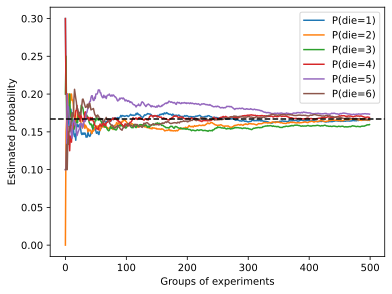

In [29]:
d2l.set_figsize((6,4.5))
for i in range(6):
  d2l.plt.plot(estimates[:,i].numpy(),label=("P(die=" + str(i+1) + ")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();